# Plot Generator 

In [6]:
import numpy as np 
import pandas as pd 
import matplotlib.pylab as plt

# setup plotting
plt.style.use('ggplot')

In [9]:
# -----------------------------------------------------------------------
# # setup program constants 
# percentage of poisoning levels  
POI_RNG = [.01, .025, .05, .075, .1, .125, .15, .175, .2]
# total number of poisoning levels 
NPR = len(POI_RNG)
# percentage of features that we want to select 
SEL_PERCENT = .1
# number of algorithms that we are going to test [JMI, MIM, MRMR, MIFS]
NALG = 4
# used when we select features 
FEAT_IDX = 0
# number of cross validation runs to perform
CV = 5
# dataset names 
# did not run 
#   - bank, miniboone, ozone, spambase, connect-4, oocytes_merluccius_nucleus_4d
DATA = [
         'conn-bench-sonar-mines-rocks',
        'ionosphere',
        'bank',
        'oocytes_trisopterus_nucleus_2f', 
        'statlog-german-credit', 
        'molec-biol-promoter', 
        # 'ozone', 
        # 'spambase',
        'parkinsons', 
        'oocytes_merluccius_nucleus_4d',
        'musk-1', 
#         'musk-2', 
        'chess-krvkp', 
        'twonorm'
        ]
BOX = ['0.5', '1', '1.5', '2', '2.5', '5']
ALGS = ['MIM', 'MIFS', 'MRMR', 'JMI']

# -----------------------------------------------------------------------

clrs = ['g', 'k', 'b', 'r']
mkrs = ['*', 's', 'o', '^']

#-------------------------------------------------------------------------

In [8]:
# for l in range(len(DATA)): 
#     for i in range(len(BOX)): 
#         d = np.load('results/M1_M2_M3/' + DATA[l] + '_[xiao][' + BOX[i] + ']_results.npz')
#         feat_stability, err_kuncheva, pois_KNN_error, norm_KNN_error = d['M1'], d['M2'], d['M3_pois'], d['M3_norm']
#         print("M1\n", feat_stability)
#         print("M2\n", err_kuncheva)
#         print("M3: Classification error on poisonous data\n", pois_KNN_error)
#         print("M3: Classification error on normal data\n", norm_KNN_error)
        

C:\Users\Srishti\Anaconda3\envs\research\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


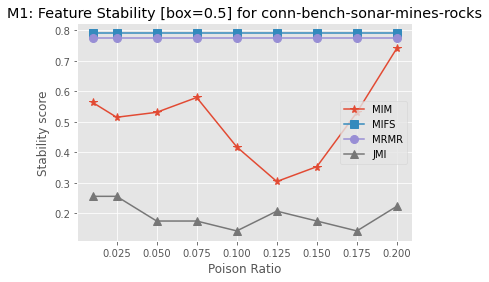

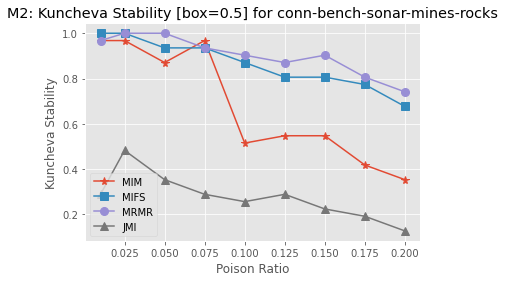

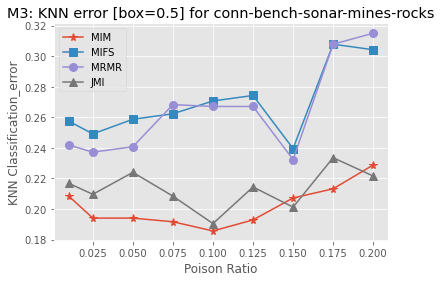

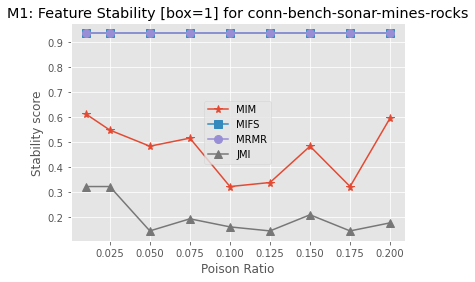

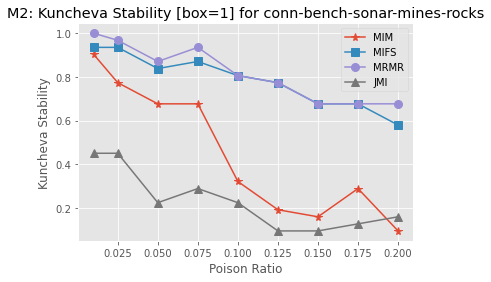

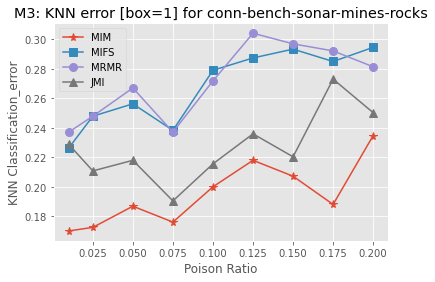

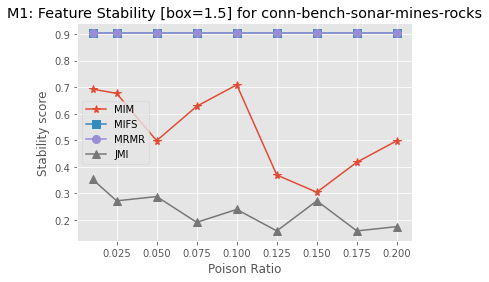

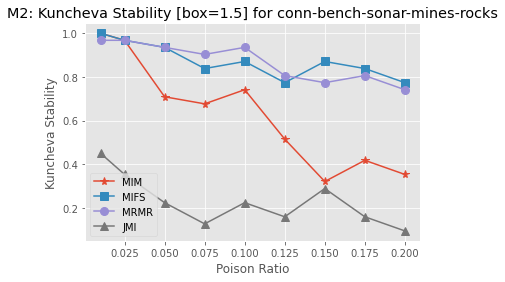

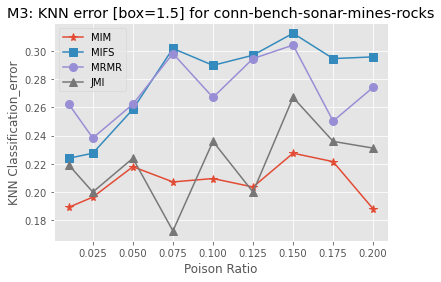

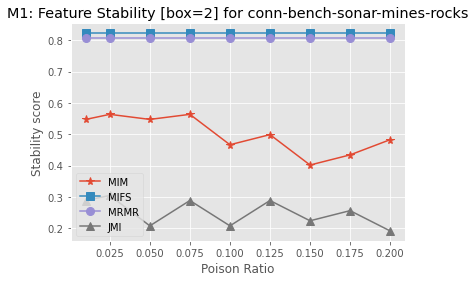

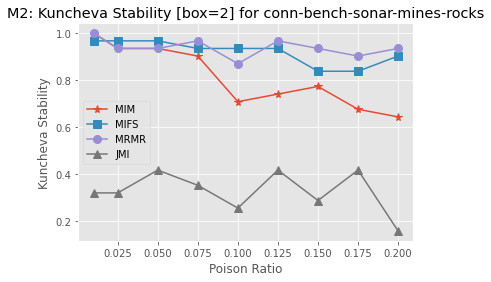

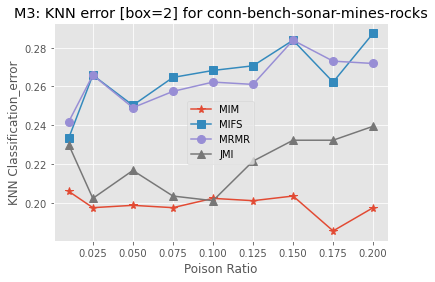

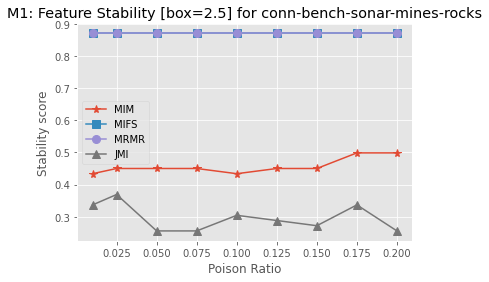

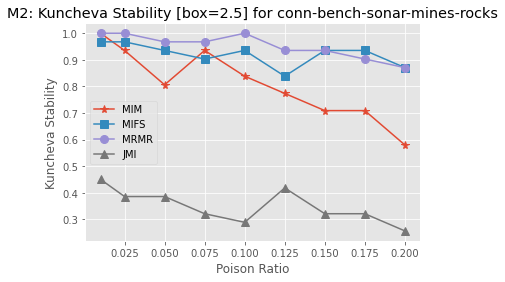

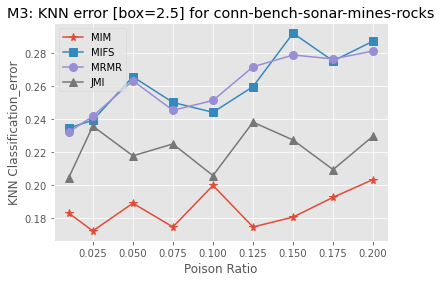

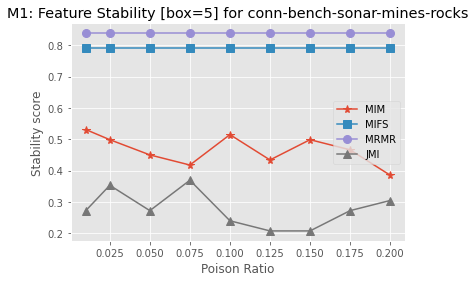

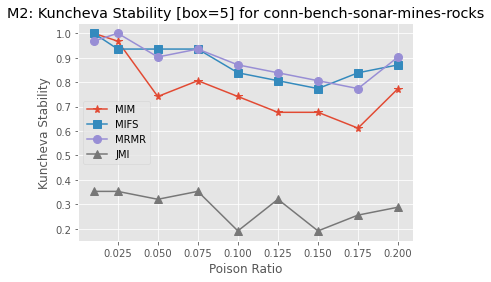

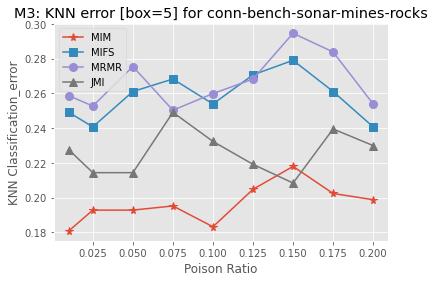

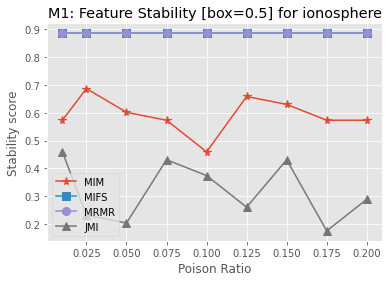

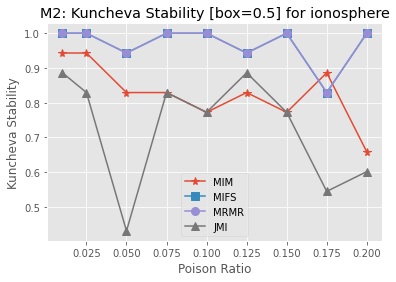

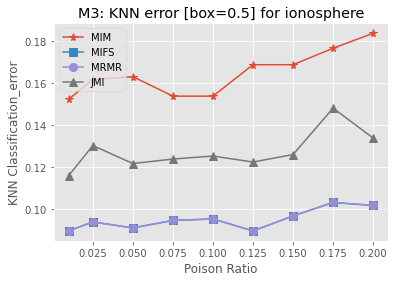

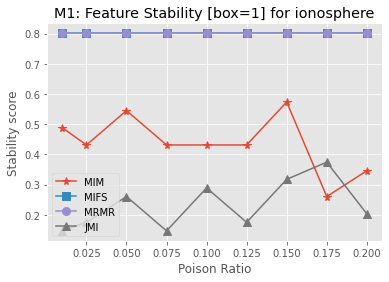

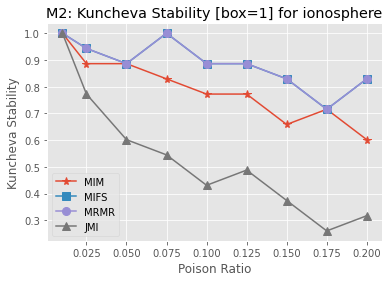

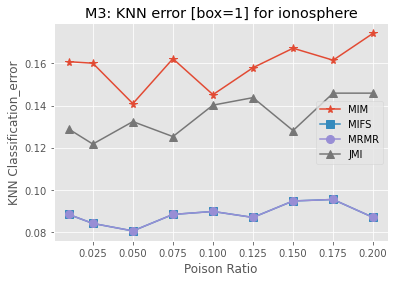

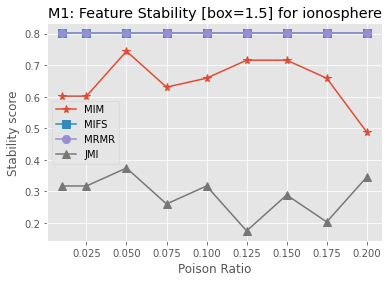

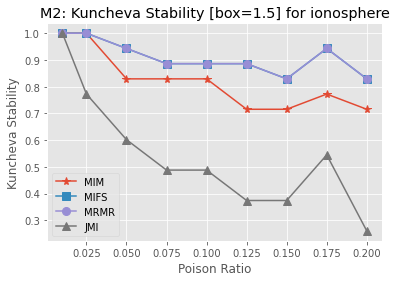

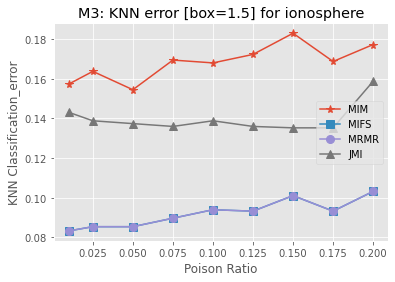

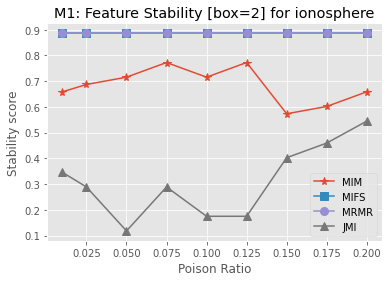

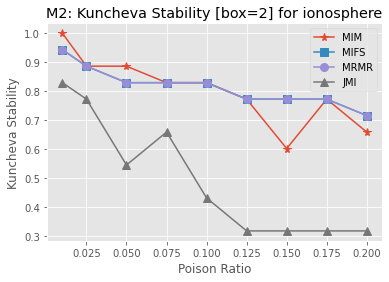

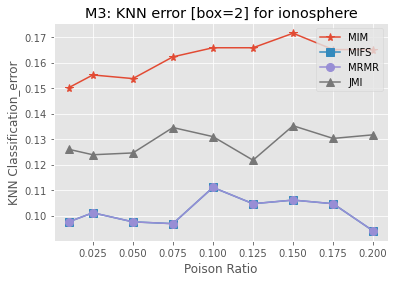

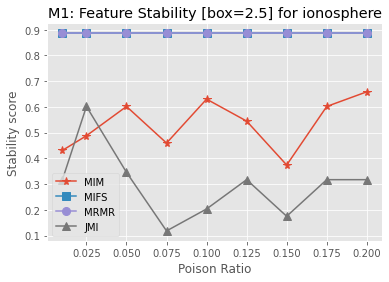

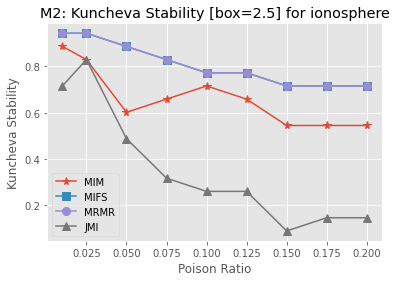

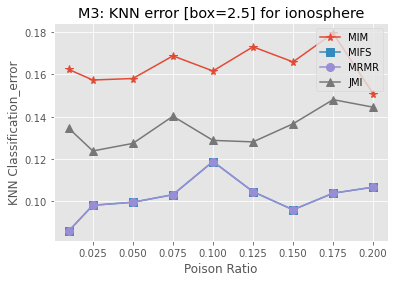

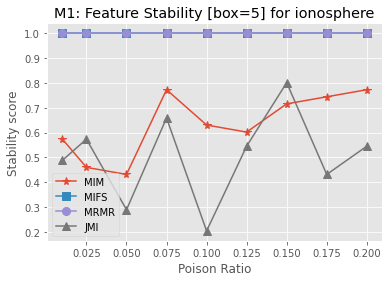

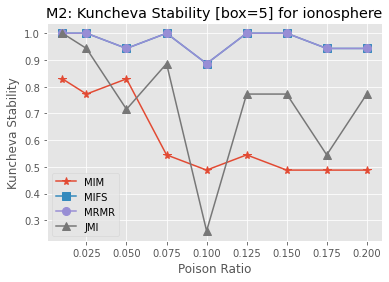

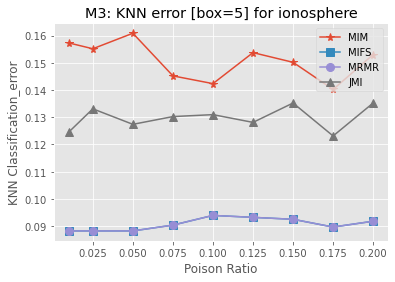

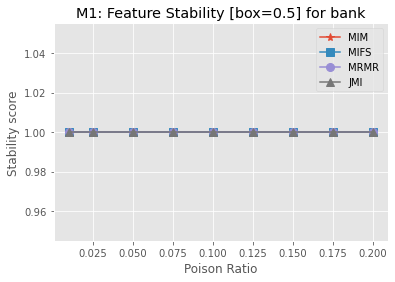

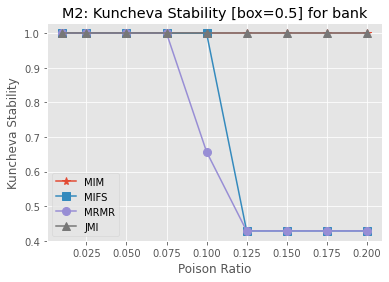

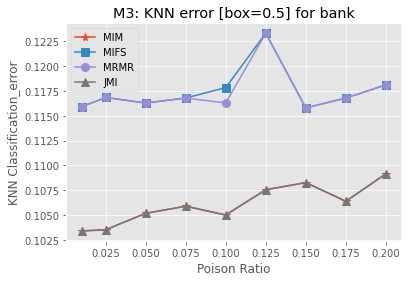

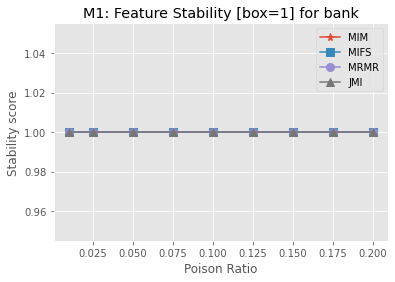

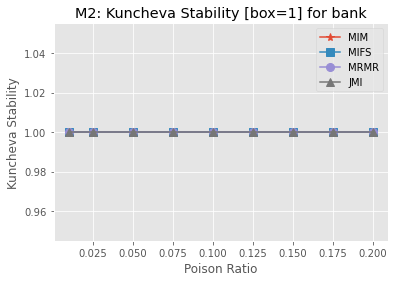

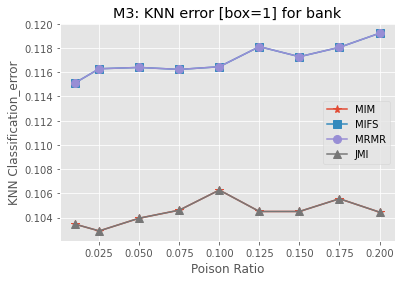

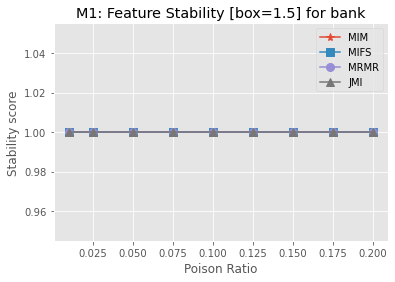

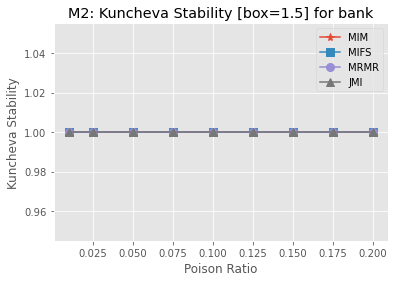

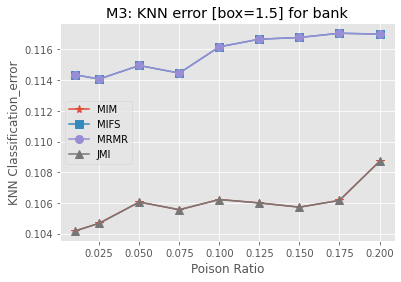

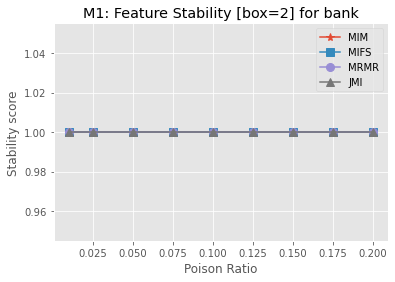

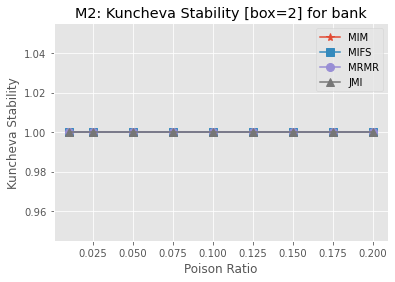

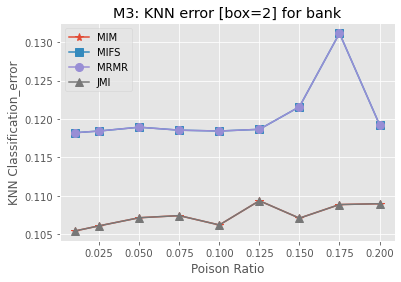

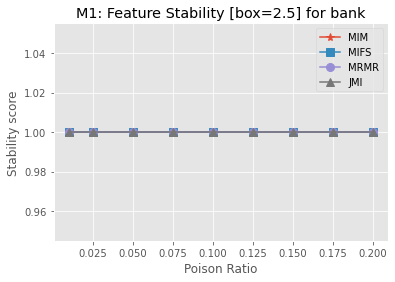

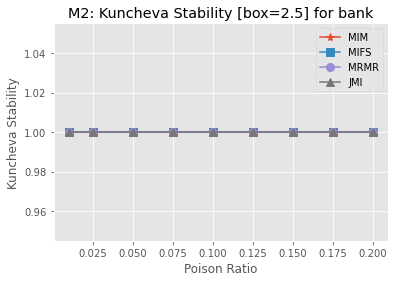

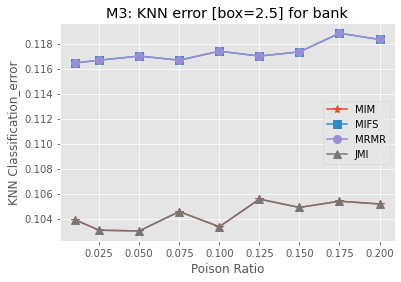

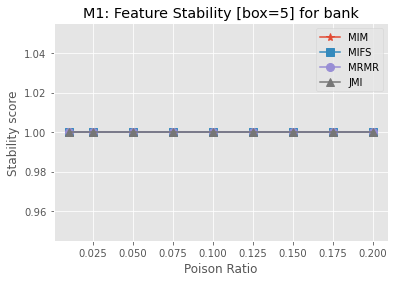

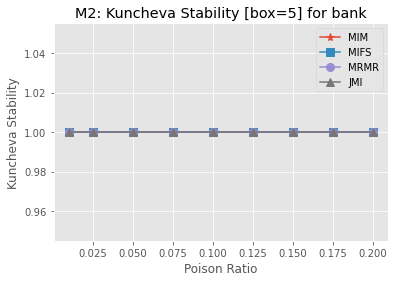

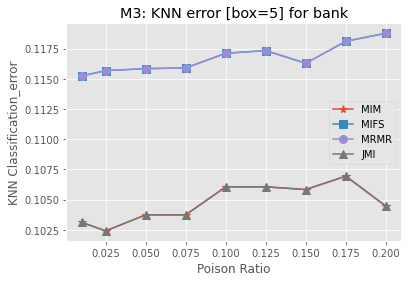

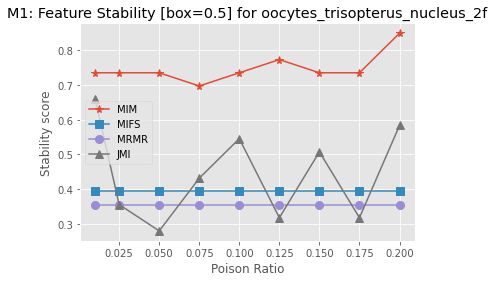

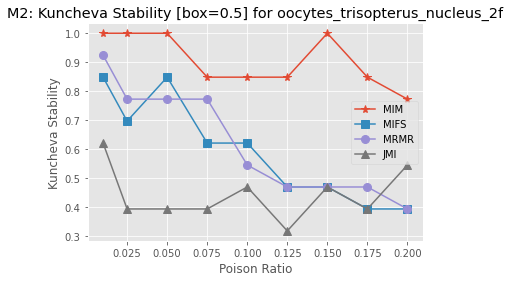

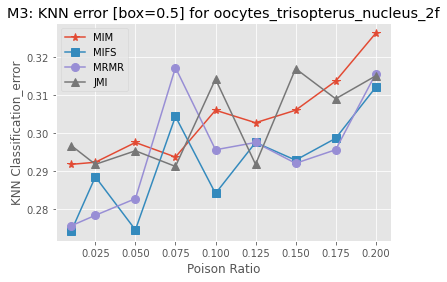

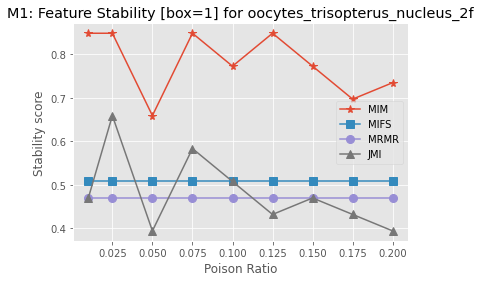

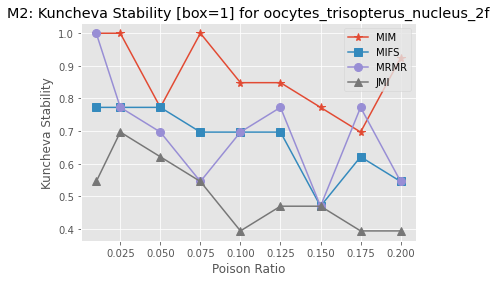

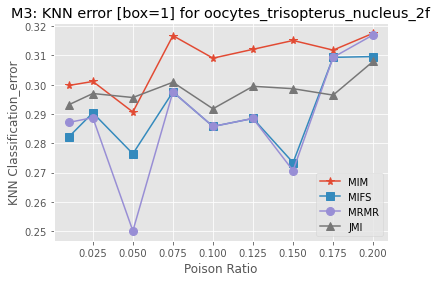

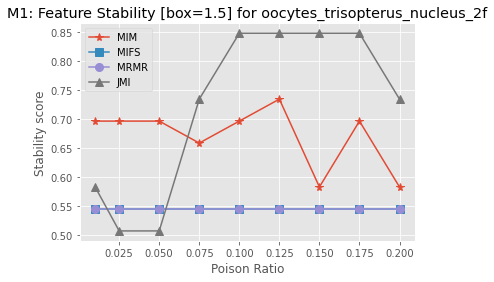

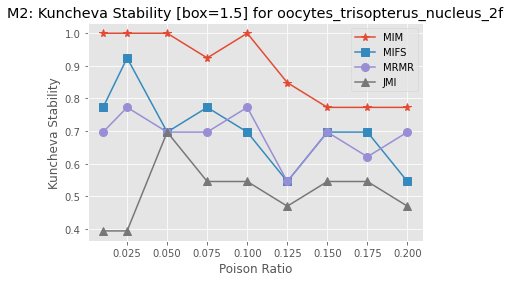

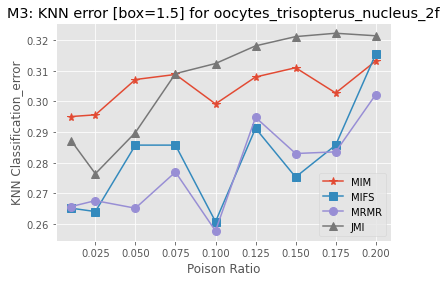

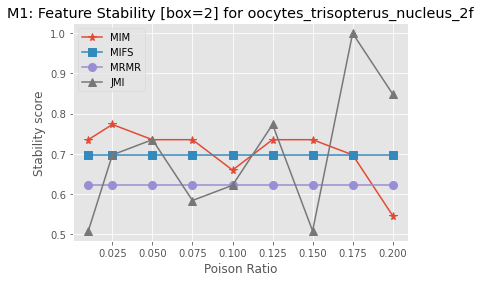

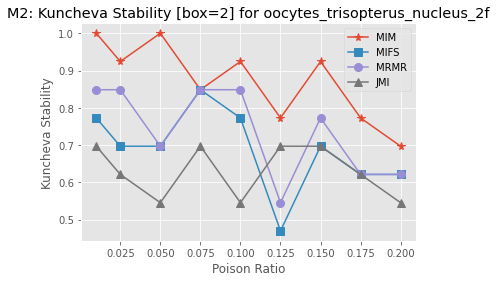

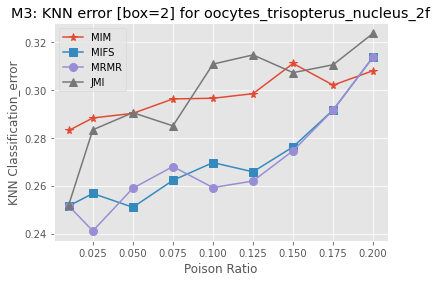

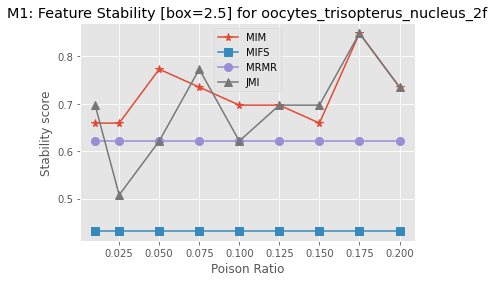

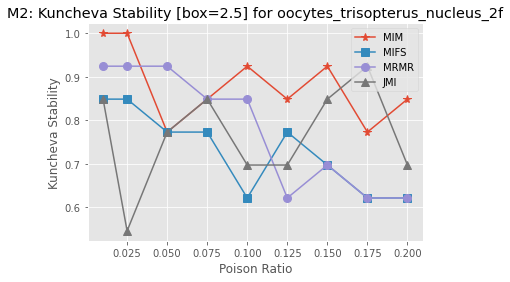

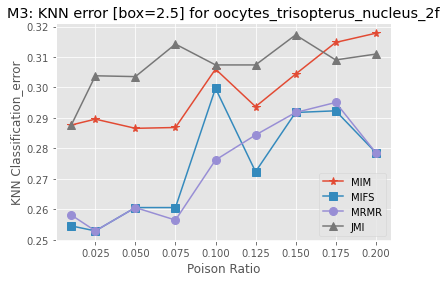

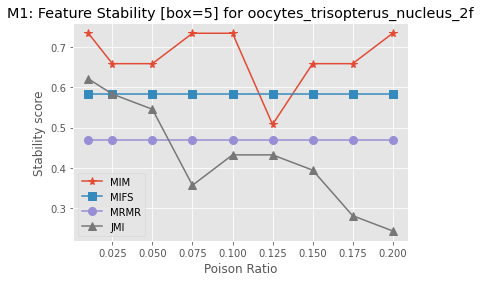

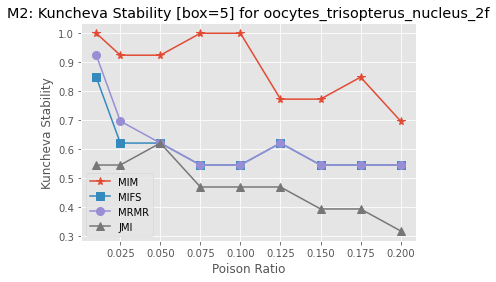

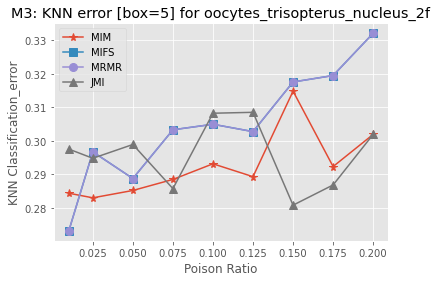

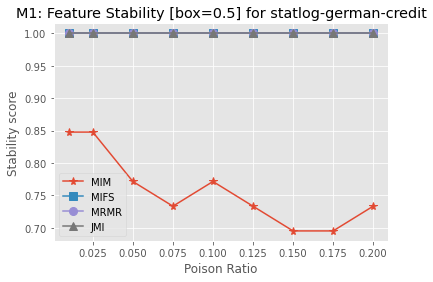

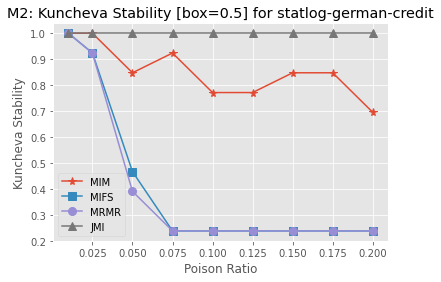

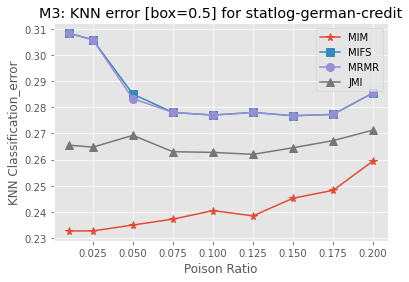

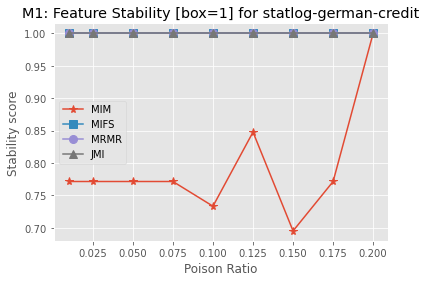

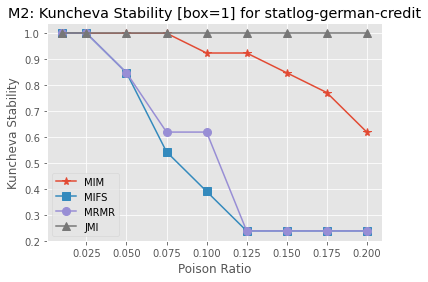

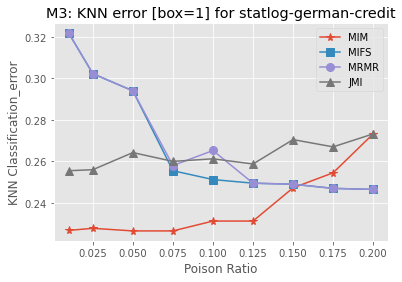

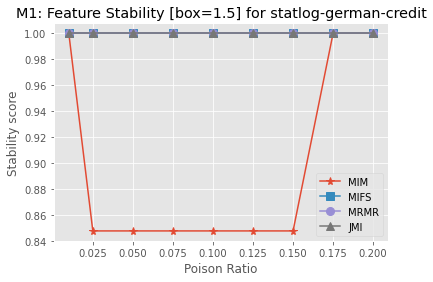

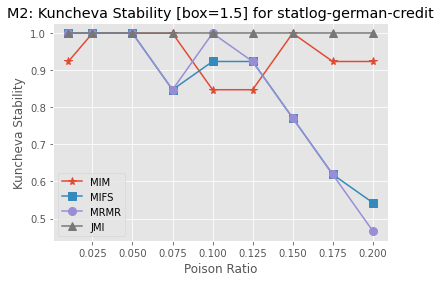

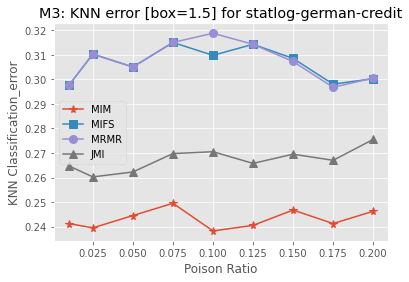

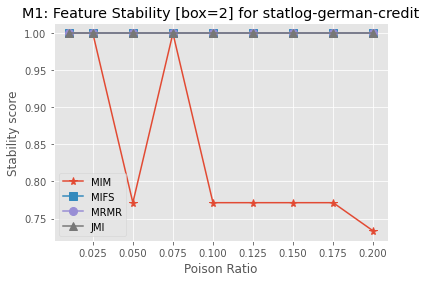

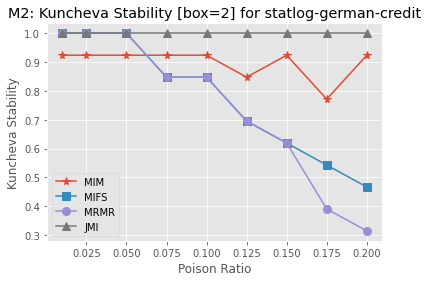

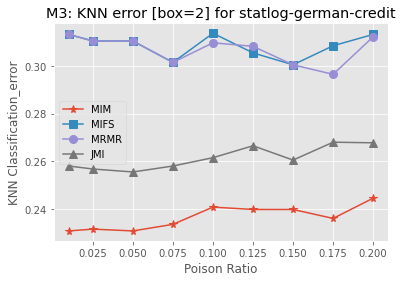

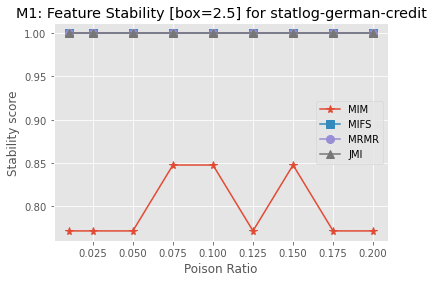

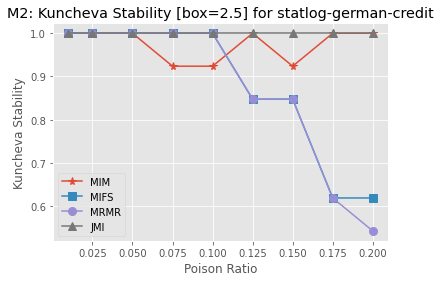

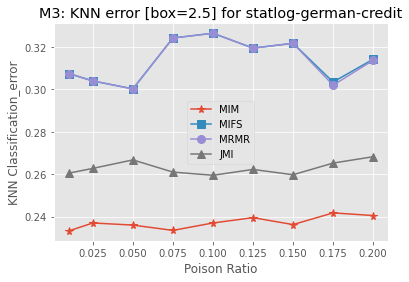

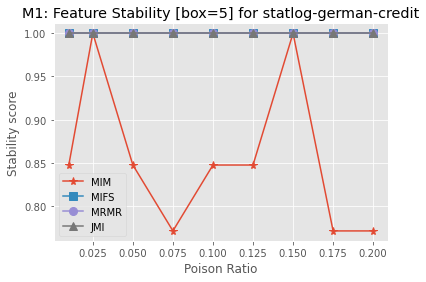

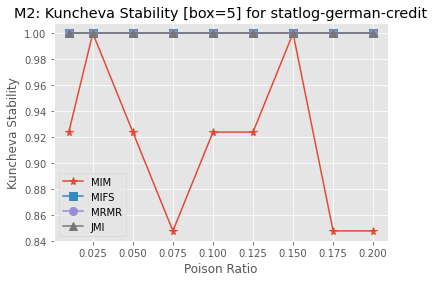

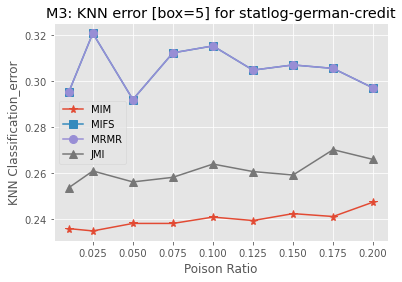

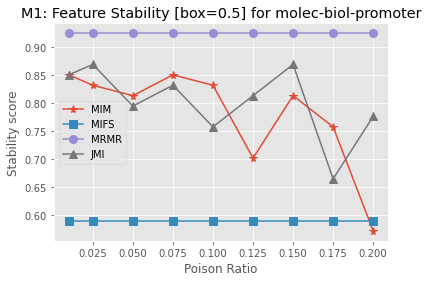

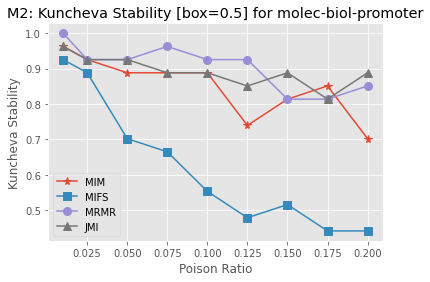

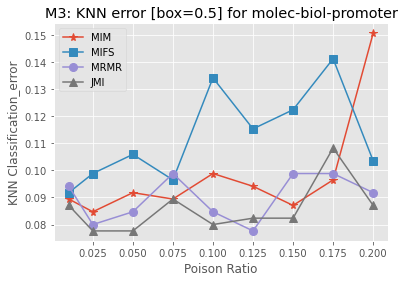

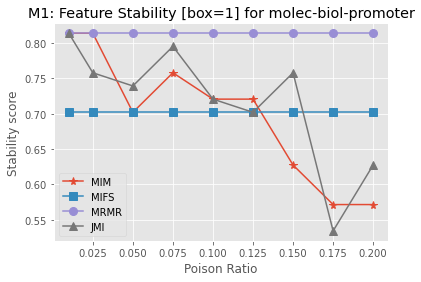

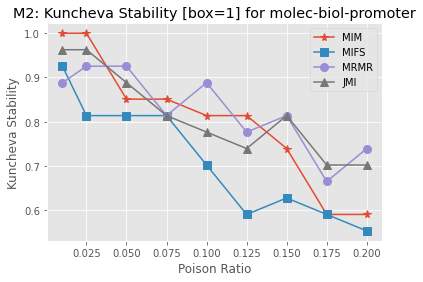

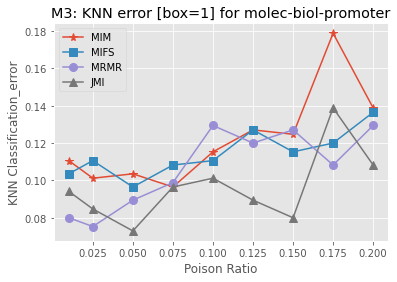

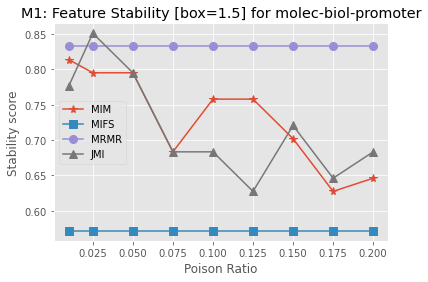

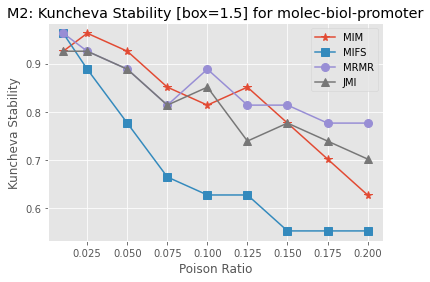

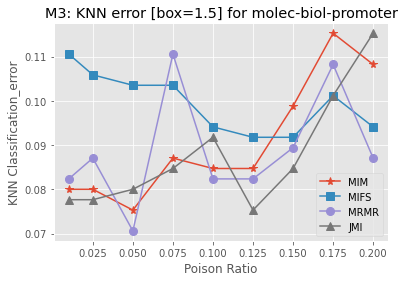

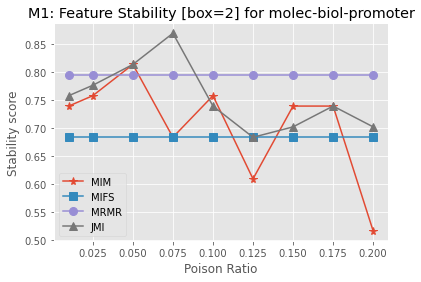

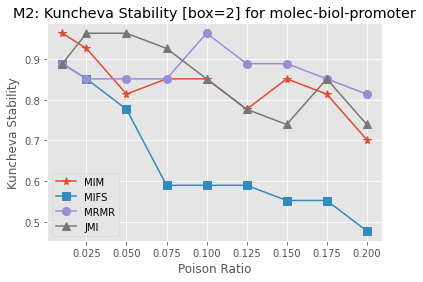

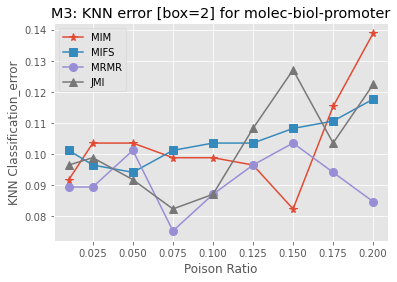

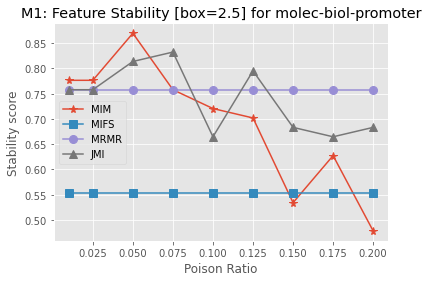

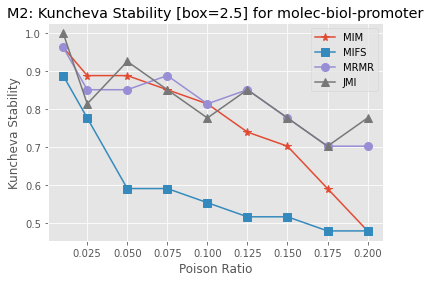

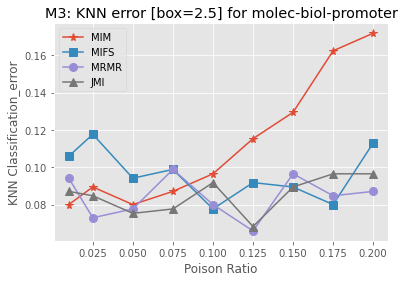

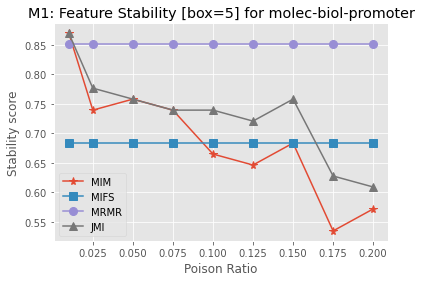

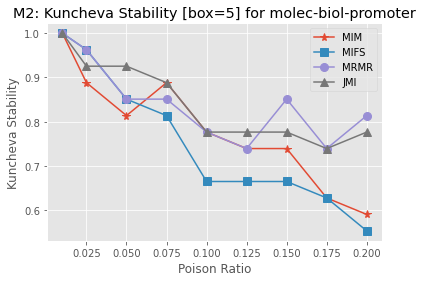

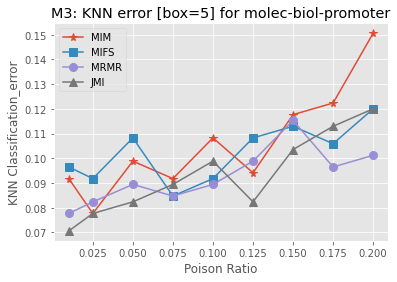

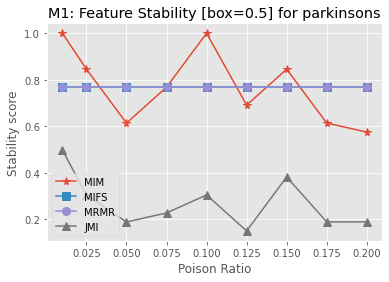

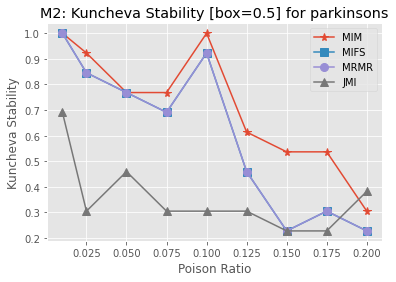

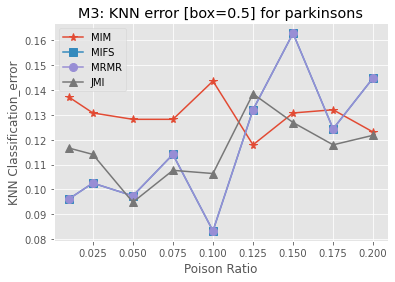

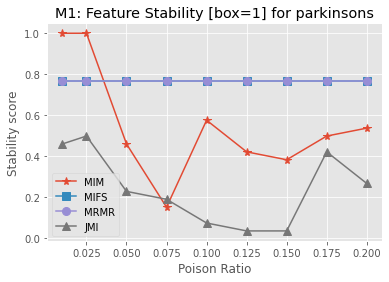

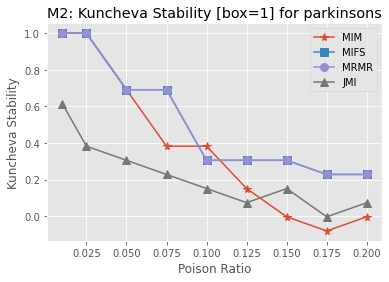

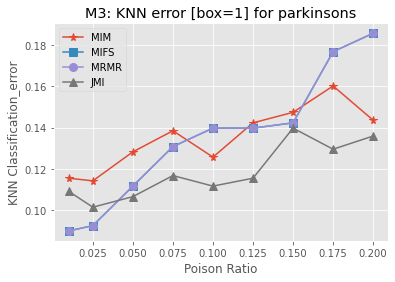

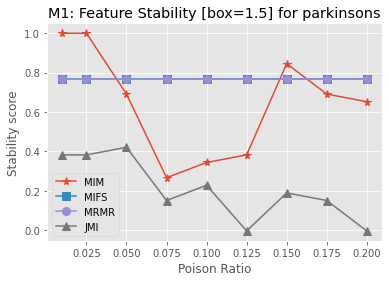

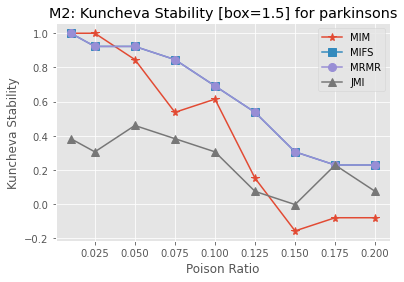

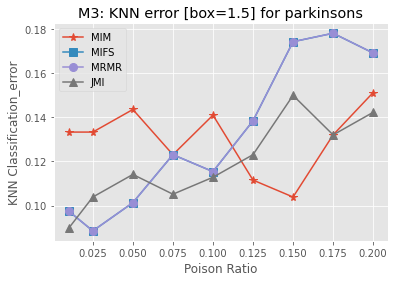

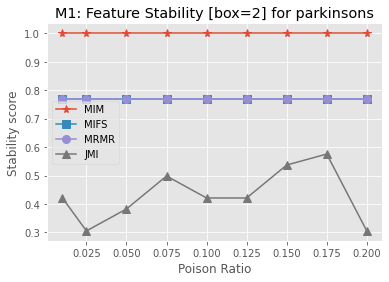

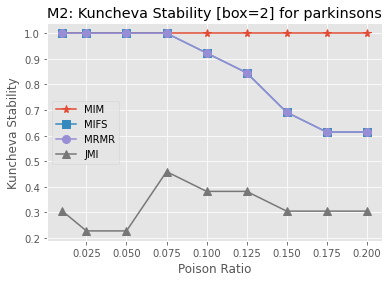

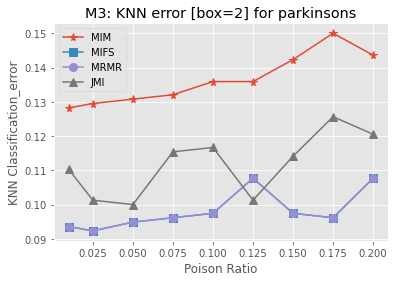

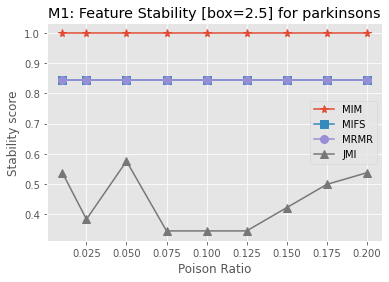

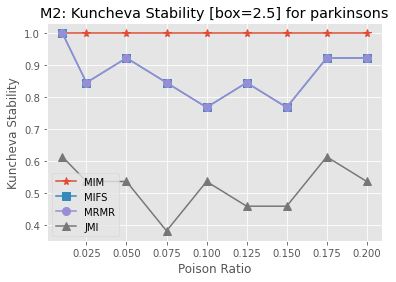

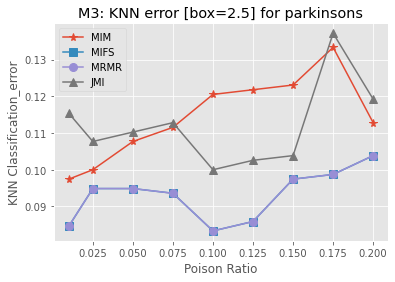

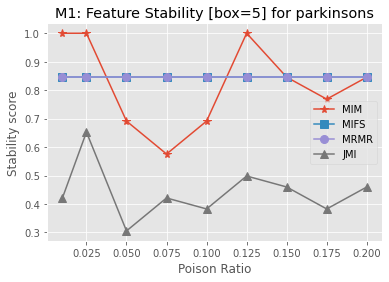

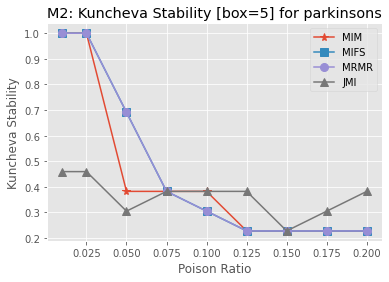

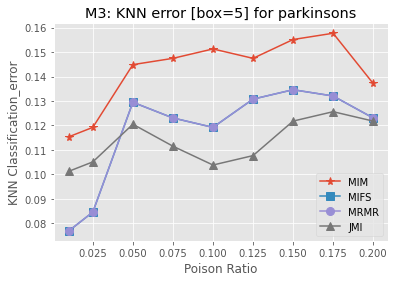

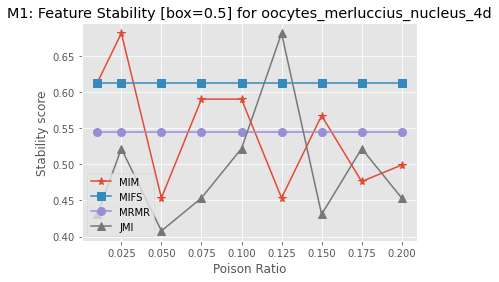

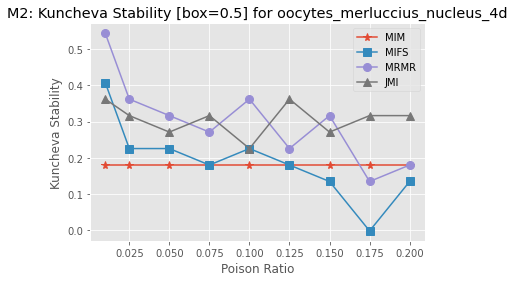

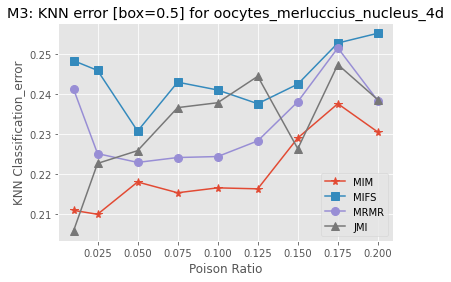

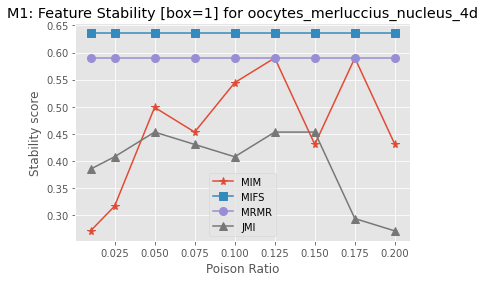

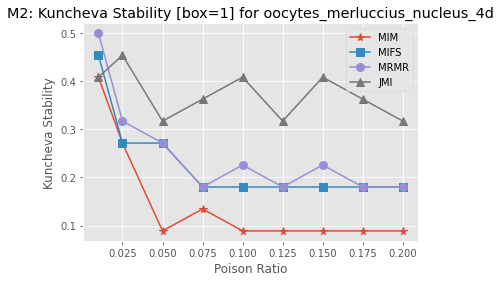

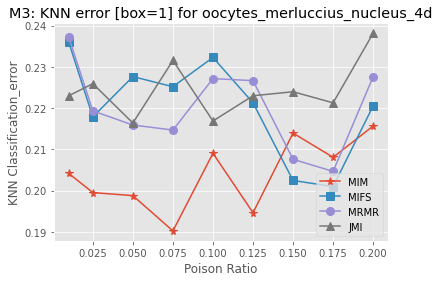

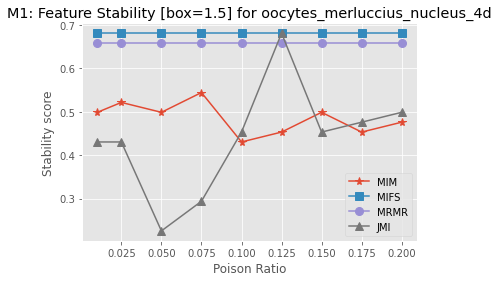

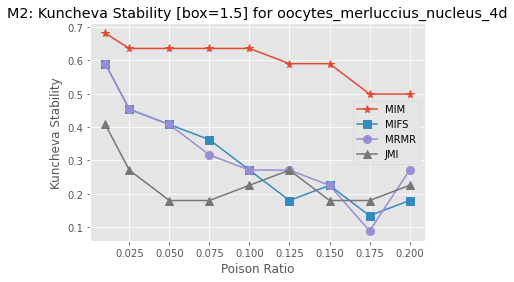

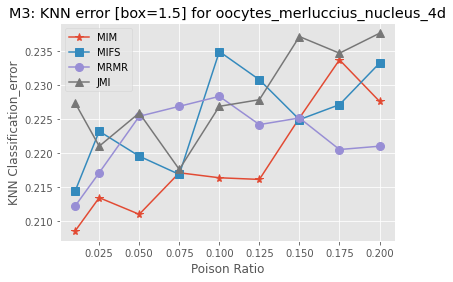

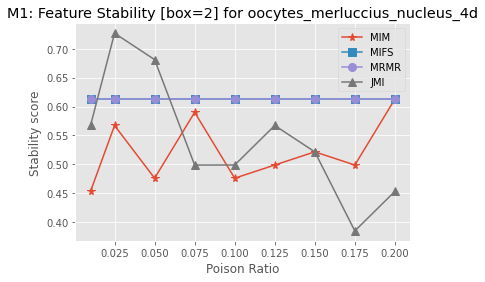

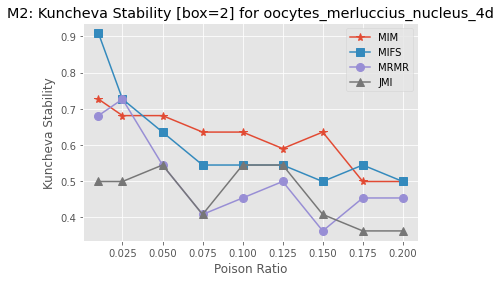

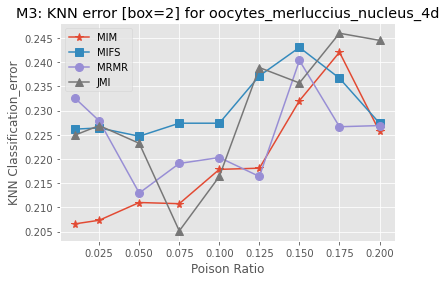

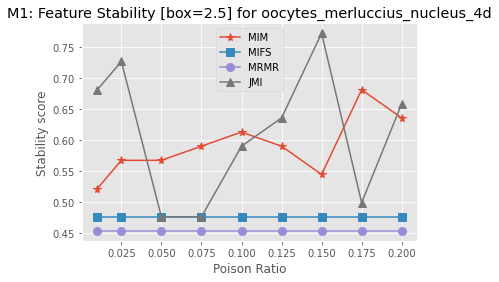

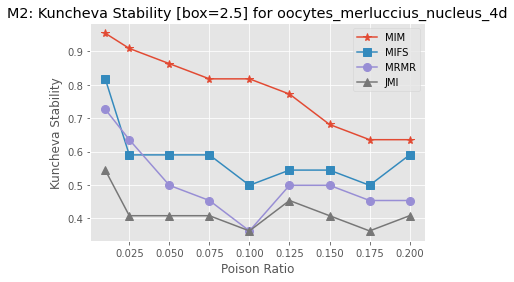

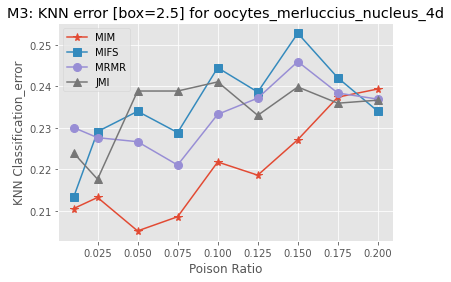

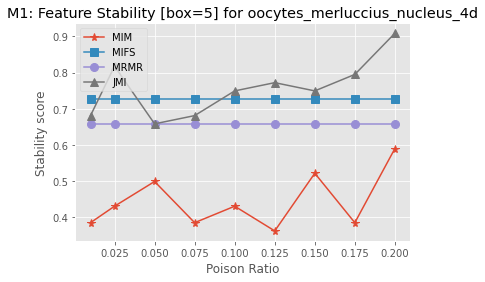

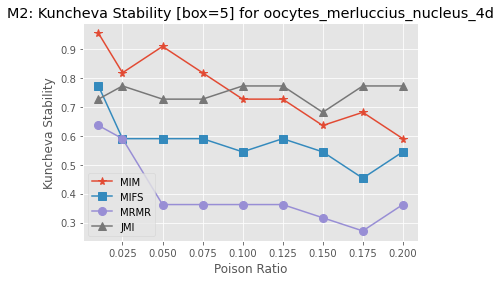

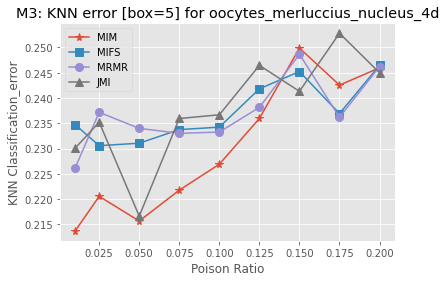

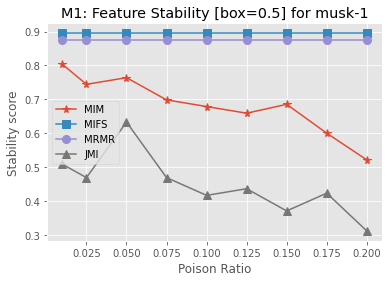

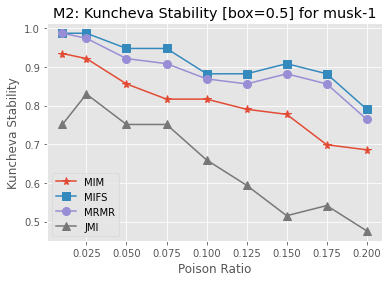

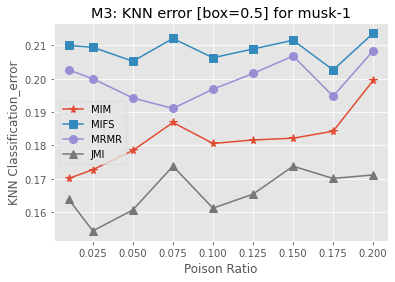

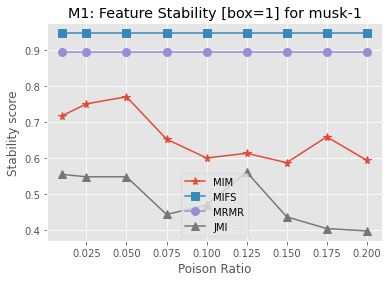

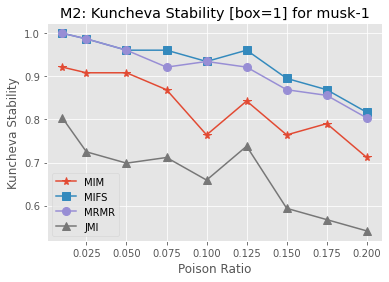

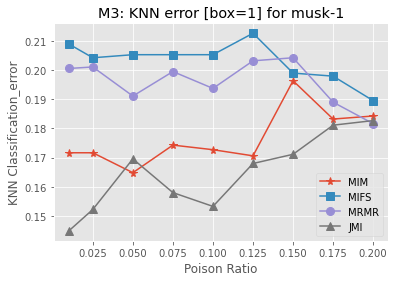

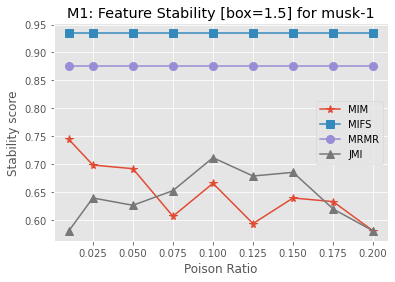

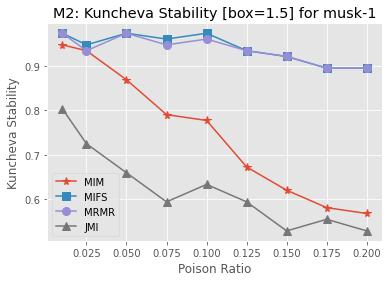

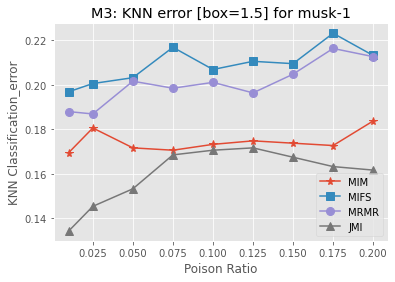

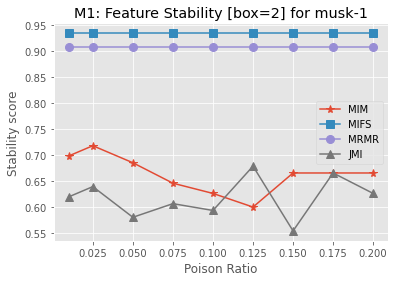

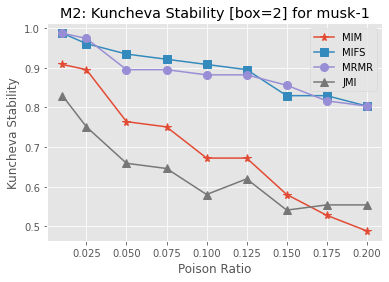

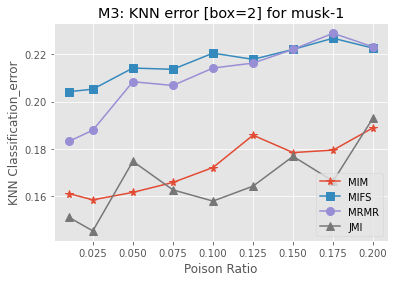

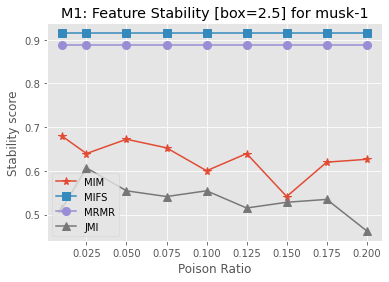

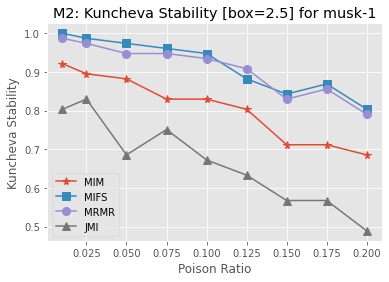

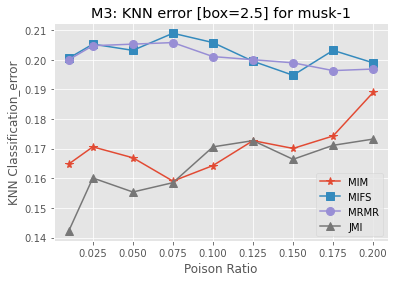

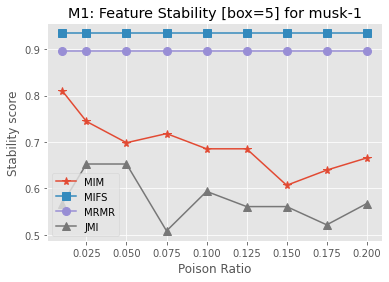

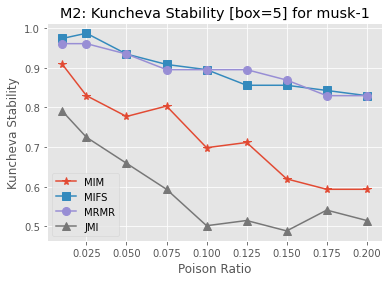

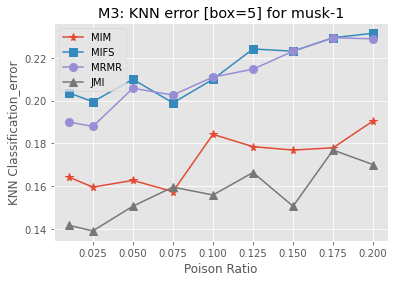

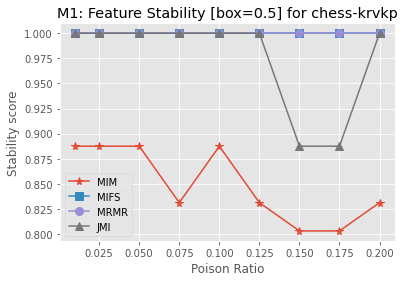

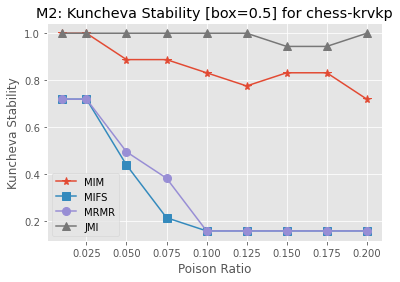

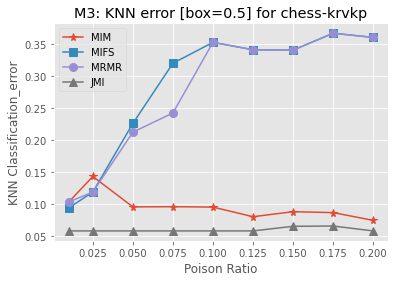

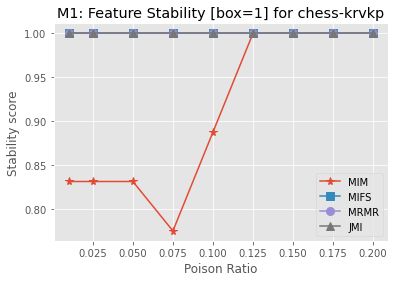

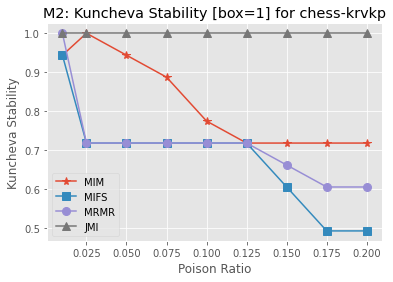

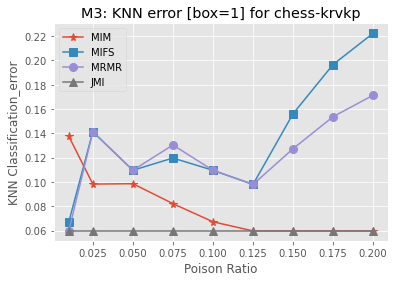

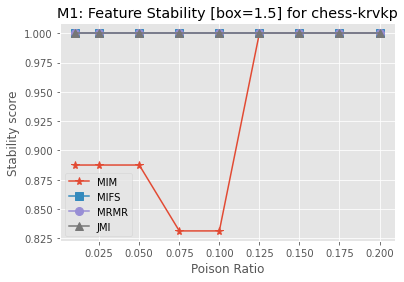

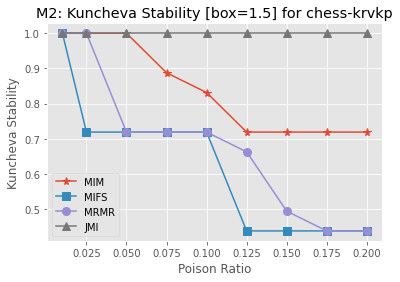

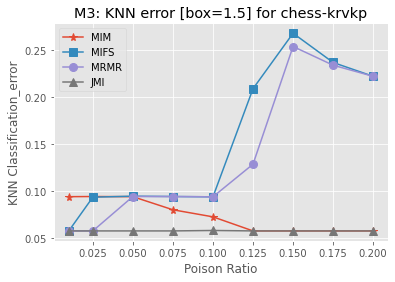

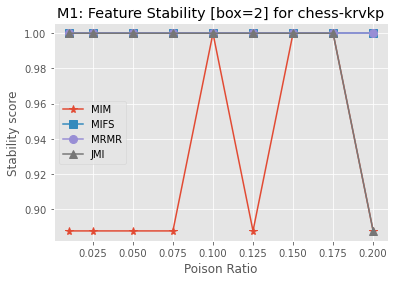

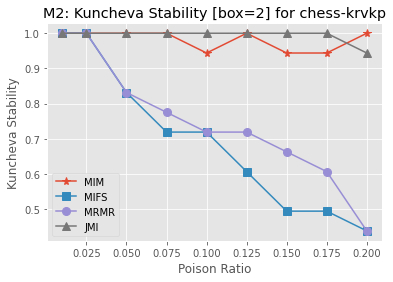

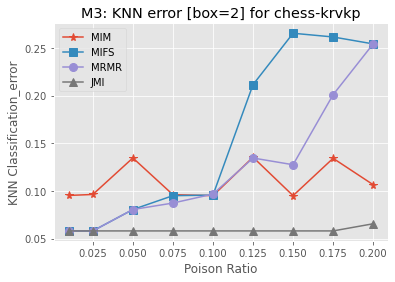

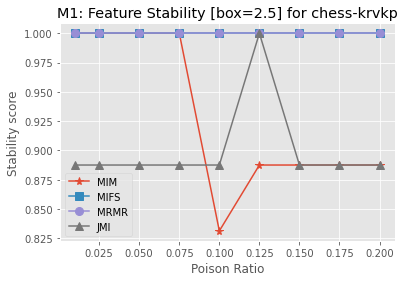

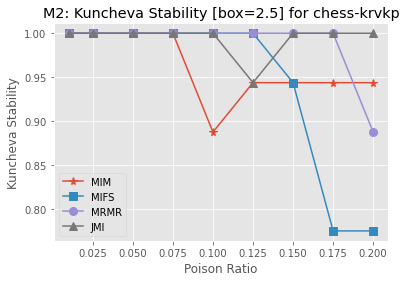

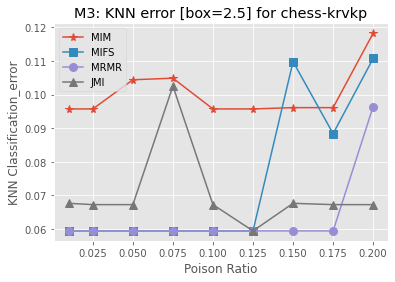

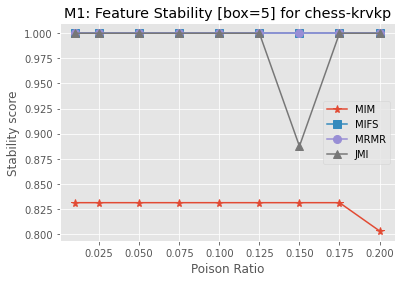

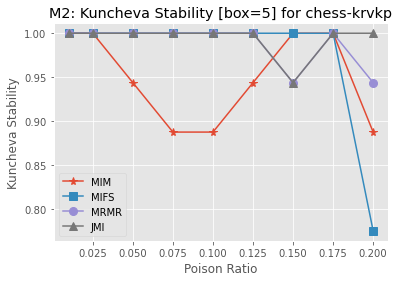

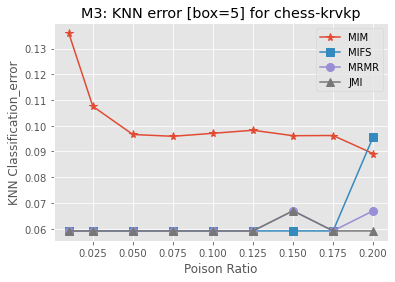

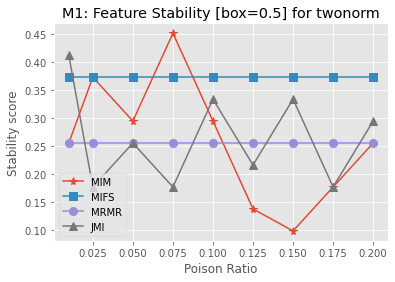

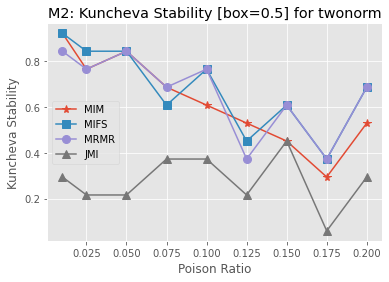

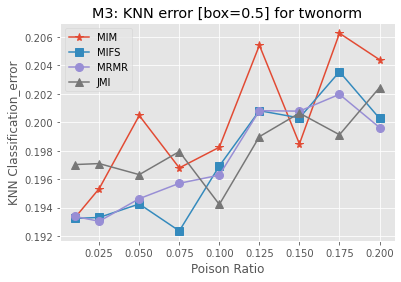

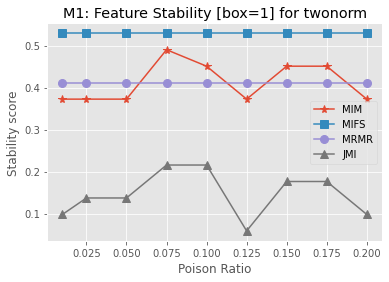

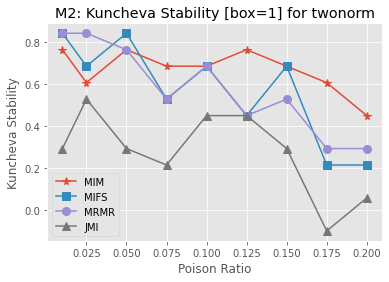

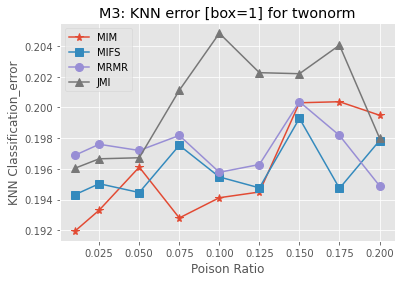

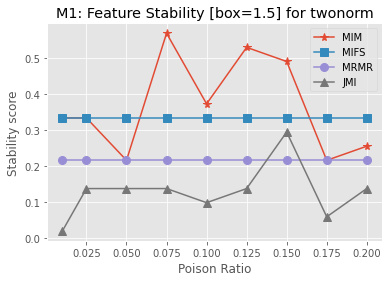

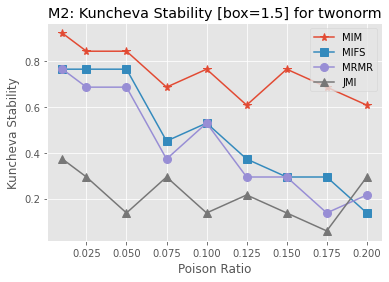

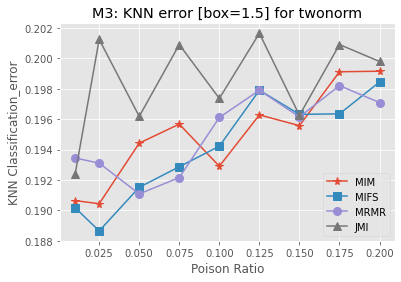

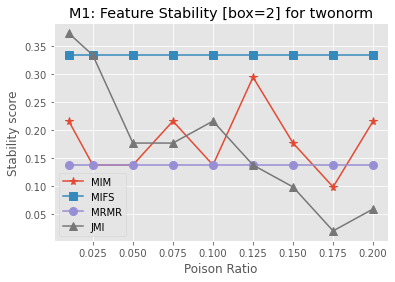

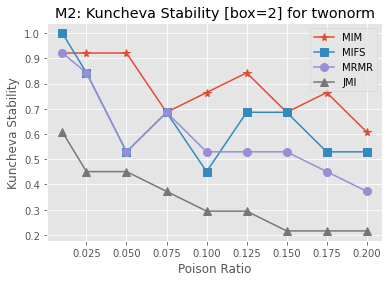

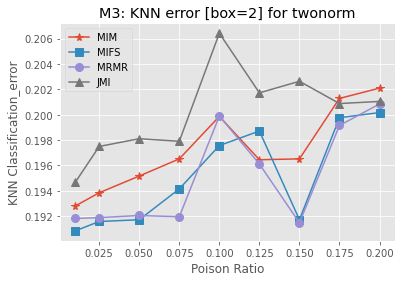

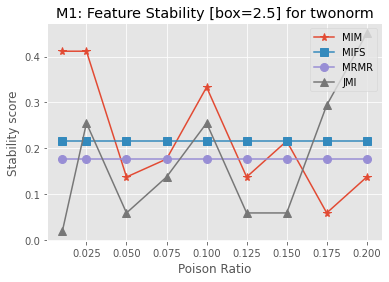

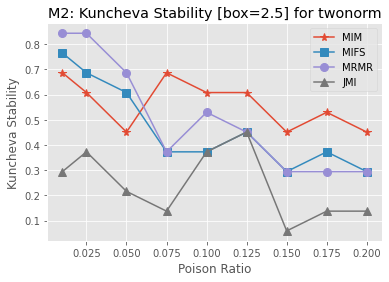

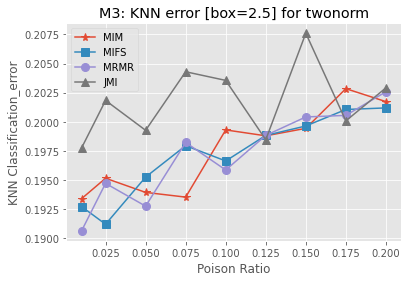

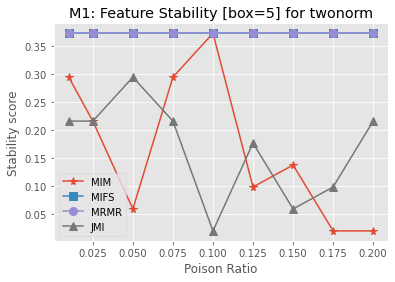

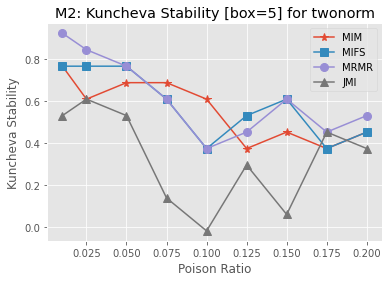

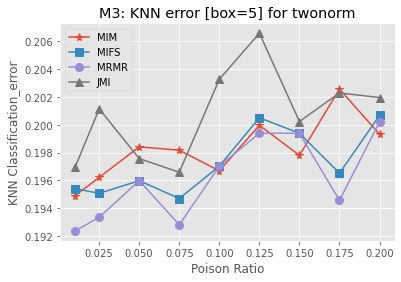

In [10]:

for l in range(len(DATA)): 
    for i in range(len(BOX)): 
        d = np.load('results/M1_M2_M3/' + DATA[l] + '_[xiao][' + BOX[i] + ']_results.npz')
        feat_stability, err_kuncheva, pois_KNN_error, norm_KNN_error =d['M1'], d['M2'], d['M3_pois'], d['M3_norm']
    
        plt.figure()
        for j in range(feat_stability.shape[1]): 
            plt.plot(POI_RNG, feat_stability[:,j], marker=mkrs[j], label=ALGS[j], markersize=8)
        plt.legend()
        plt.xlabel('Poison Ratio')
        plt.ylabel('Stability score')
        plt.title('M1: Feature Stability [box=' + BOX[i] + '] for '+ DATA[l])
        plt.savefig('plots/M1_M2_M3/' + DATA[l] + '_M1_[xiao][' + BOX[i] + '].pdf')
        
        
        plt.figure()
        for j in range(err_kuncheva.shape[1]): 
            plt.plot(POI_RNG, err_kuncheva[:,j], marker=mkrs[j], label=ALGS[j], markersize=8)
        plt.legend()
        plt.xlabel('Poison Ratio')
        plt.ylabel('Kuncheva Stability')
        plt.title('M2: Kuncheva Stability [box=' + BOX[i] + '] for '+ DATA[l])
        plt.savefig('plots/M1_M2_M3/' + DATA[l] + '_M2_[xiao][' + BOX[i] + '].pdf')
        
        plt.figure()
        for j in range(pois_KNN_error.shape[1]): 
            plt.plot(POI_RNG, pois_KNN_error[:,j], marker=mkrs[j], label=ALGS[j], markersize=8)
        #plt.plot(POI_RNG, norm_KNN_error, marker= 'd', label = 'FS_norm', markersize = 8)
        plt.legend()
        plt.xlabel('Poison Ratio')
        plt.ylabel('KNN Classification_error')
        plt.title('M3: KNN error [box=' + BOX[i] + '] for '+ DATA[l])
        plt.savefig('plots/M1_M2_M3/' + DATA[l] + '_M3_[xiao][' + BOX[i] + '].pdf')
    